This notebook has been inspired by [Q* Learning with FrozenLakev2.ipynb](https://colab.research.google.com/github/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q_Learning_with_FrozenLakev2.ipynb#scrollTo=Xr9nI6dcQM8I) and [Deep Reinforcement Learning Course](https://huggingface.co/learn/deep-rl-course/unit0/introduction?fw=pt) by Thomas Simonini

# Day 1: Introduction to Reinforcement Learning (RL) and Markov Decision Process (MDP)

Reinforcement Learning (RL) is a branch of machine learning that focuses on learning optimal actions to take in a given environment to maximize a cumulative reward or return.

Markov Decision Process (MDP) is a mathematical framework for modeling decision-making problems in RL. It consists of states, actions, transition probabilities, and rewards.


## OpenAI Gym

[OpenAI Gym](https://www.gymlibrary.dev/) is a toolkit for developing and comparing reinforcement learning (RL) algorithms. It consists of a growing suite of environments (from simulated robots to Atari games), and a site for comparing and reproducing results. OpenAI Gym provides a diverse suite of environments that range from easy to difficult and involve many different kinds of data.

Creating and Interacting with gym environments is very simple.

```
import gym
env = gym.make("CartPole-v1")
observation, info = env.reset(seed=42)

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()
```

Following are the definitions of some common terminologies used.

**Reset:** Resets the environment to an initial state and returns the initial observation. <br>
**Step:** Run one timestep of the environment's dynamics.<br>
**Observation:** The observed state of the environment.<br>
**Action:** An action provided by the agent.<br>
**Reward:** The amount of reward returned as a result of taking the action.<br>
**Terminated:** Whether a terminal state (as defined under the MDP of the task) is reached.<br>
**Truncated:** Whether a truncation condition outside the scope of the MDP is satisfied. Typically a timelimit, but could also be used to indicate agent physically going out of bounds.<br>
**Info:** This contains auxiliary diagnostic information (helpful for debugging, learning, and logging).<br>
**Action Space:** This attribute gives the format of valid actions. It is of datatype Space provided by Gym. For example, if the action space is of type Discrete and gives the value Discrete(2), this means there are two valid discrete actions: 0 & 1.<br>
**Observation:** This attribute gives the format of valid observations. It is of datatype Space provided by Gym. For example, if the observation space is of type Box and the shape of the object is (4,), this denotes a valid observation will be an array of 4 numbers.<br>

Note: Previously, `terminated` and `truncated` used to be merged under one variable `done`. <br>


We will use OpenAI Gym for Frozen Lake (2D) and Cart Pole (1D) environments.

# Cart Pole

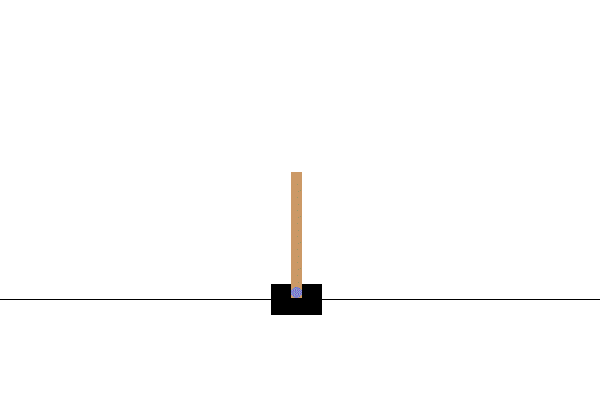

# Cart Pole

|   |   |
|---|---|
| Action Space | Discrete(2) |
| Observation Shape | (4,) |
| Observation High | [4.8   inf 0.42  inf] |
| Observation Low | [-4.8   -inf -0.42  -inf] |
| Import | `gym.make("CartPole-v1")` | 


### Description

This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in
["Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem"](https://ieeexplore.ieee.org/document/6313077).
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.
The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces
 in the left and right direction on the cart.

### Action Space

The action is a `ndarray` with shape `(1,)` which can take values `{0, 1}` indicating the direction
 of the fixed force the cart is pushed with.

| Num | Action                 |
|-----|------------------------|
| 0   | Push cart to the left  |
| 1   | Push cart to the right |

**Note**: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle
 the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it

### Observation Space

The observation is a `ndarray` with shape `(4,)` with the values corresponding to the following positions and velocities:

| Num | Observation           | Min                 | Max               |
|-----|-----------------------|---------------------|-------------------|
| 0   | Cart Position         | -4.8                | 4.8               |
| 1   | Cart Velocity         | -Inf                | Inf               |
| 2   | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
| 3   | Pole Angular Velocity | -Inf                | Inf               |

**Note:** While the ranges above denote the possible values for observation space of each element,
    it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:
-  The cart x-position (index 0) can be take values between `(-4.8, 4.8)`, but the episode terminates
   if the cart leaves the `(-2.4, 2.4)` range.
-  The pole angle can be observed between  `(-.418, .418)` radians (or **±24°**), but the episode terminates
   if the pole angle is not in the range `(-.2095, .2095)` (or **±12°**)

### Rewards

Since the goal is to keep the pole upright for as long as possible, a reward of `+1` for every step taken,
including the termination step, is allotted. The threshold for rewards is 475 for v1.

### Starting State

All observations are assigned a uniformly random value in `(-0.05, 0.05)`

### Episode End

The episode ends if any one of the following occurs:

1. Termination: Pole Angle is greater than ±12°
2. Termination: Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)
3. Truncation: Episode length is greater than 500 (200 for v0)

Docs/source: https://www.gymlibrary.dev/environments/classic_control/cart_pole/

# Policies
A policy is a mapping from states to actions. It determines the action to take in each state.

In the following code cells, we will define and evaluate different policies for the 1D and 2D environments.


In [6]:
import gym

In [7]:
# Function to evaluate a policy in an environment
def evaluate_policy(env, policy, num_episodes=1000):
    rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        episode_reward = 0
        done = False
        while not done:
            action = policy(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            episode_reward += reward
            state = next_state
        rewards.append(episode_reward)
    return sum(rewards) / num_episodes

## 1D

In [8]:
# Create the CartPole environment (1D)
env_1d = gym.make("CartPole-v1", render_mode="rgb_array")

In [9]:
env_1d.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [10]:
env_1d.action_space, env_1d.action_space.n

(Discrete(2), 2)

In [14]:
done = False
state, _ = env_1d.reset()
while not done:
    action = angle_policy(state)
    print(state[2])
    next_state, reward, terminated, truncated, info = env_1d.step(action)
    done = terminated or truncated
    state = next_state
    

0.004582464
0.0046051485
-0.0011968394
-0.012823367
-0.01860378
-0.018611971
-0.012885049
-0.0014230228
0.015810924
0.038889576
0.056214552
0.06793541
0.074167095
0.07498862
0.07044231
0.060533635
0.045231413
0.024468431
-0.0018574932
-0.03388193
-0.060064297
-0.080608904
-0.09568879
-0.10544333
-0.10997672
-0.10935711
-0.103616305
-0.09274971
-0.076716684
-0.055441145
-0.028812561
0.0033126543
0.041109137
0.07307256
0.099444225
0.12043694
0.13623196
0.14697704
0.15278521
0.15373424
0.14986631
0.14118814
0.12767115
0.10925197
0.08583302
0.057283457
0.0234405
-0.01588871
-0.060924493
-0.10020536
-0.13402227
-0.16264161
-0.18630153
-0.20520939


In [6]:
# Define the "Always Left" policy
def always_left_policy(observation):
    return 0  # Action: Push cart to the left

# Define the "Always Right" policy
def always_right_policy(observation):
    return 1  # Action: Push cart to the right

In [7]:
evaluate_policy(env_1d, always_left_policy)

/Users/aljahdmk/miniconda3/envs/RL/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


9.326

In [8]:
evaluate_policy(env_1d, always_right_policy)

9.371

In [2]:
def angle_policy(observation):
    angle = observation[2]
    action = 0 if angle < 0 else 1
    return action

In [10]:
evaluate_policy(env_1d, angle_policy)

42.392

In [23]:
import random

In [24]:
def random_policy(observation):
    action = random.choice([0, 1])
    return action

In [25]:
evaluate_policy(env_1d, random_policy)

22.83

### Visualization

In [31]:
# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob
import base64, io, os

os.environ['SDL_VIDEODRIVER']='dummy'

In [20]:
os.makedirs("video", exist_ok=True)

def show_video(env_name):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(env_name, env, policy, max_steps=10000):
    vid = video_recorder.VideoRecorder(env, path="video/{}.mp4".format(env_name))
    state, _ = env.reset()
    done = False
    for t in range(max_steps):
        vid.capture_frame()
        action = policy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        print(f"state: {state}, action: {action}",next_state, reward, done)
        state = next_state
        if done:
            break
    vid.close()
    env.close()

In [29]:
show_video_of_model("CartPole-v1", env_1d, angle_policy)

state: [ 0.00025471  0.03202182 -0.0294499  -0.03247317], action: 0 [ 0.00089515 -0.1626657  -0.03009936  0.25077447] 1.0 False
state: [ 0.00089515 -0.1626657  -0.03009936  0.25077447], action: 0 [-0.00235816 -0.3573452  -0.02508387  0.53381354] 1.0 False
state: [-0.00235816 -0.3573452  -0.02508387  0.53381354], action: 0 [-0.00950507 -0.55210555 -0.0144076   0.8184883 ] 1.0 False
state: [-0.00950507 -0.55210555 -0.0144076   0.8184883 ], action: 0 [-0.02054718 -0.74702734  0.00196217  1.106605  ] 1.0 False
state: [-0.02054718 -0.74702734  0.00196217  1.106605  ], action: 1 [-0.03548773 -0.55193126  0.02409427  0.8145383 ] 1.0 False
state: [-0.03548773 -0.55193126  0.02409427  0.8145383 ], action: 1 [-0.04652635 -0.3571474   0.04038503  0.52953035] 1.0 False
state: [-0.04652635 -0.3571474   0.04038503  0.52953035], action: 1 [-0.0536693  -0.16261616  0.05097564  0.24984136] 1.0 False
state: [-0.0536693  -0.16261616  0.05097564  0.24984136], action: 1 [-0.05692162  0.03174217  0.05597247

Moviepy - Done !
Moviepy - video ready video/CartPole-v1.mp4


In [30]:
show_video("CartPole-v1")

## Frozen Lake

Frozen lake is a toy text environment involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. <br>

We can also set the lake to be slippery so that the agent does not always move in the intended direction. \but here, we will only look at the non-slippery case. But you are welcome to try the slippery one.<br>

You can read more about the environment [here](https://gymnasium.farama.org/environments/toy_text/frozen_lake/).

![Frozen Lake](https://gymnasium.farama.org/_images/frozen_lake.gif)


|   |   |
|---|---|
| Action Space | Discrete(4) |
| Observation Space | Discrete(16) |
| Import | `gym.make("FrozenLake-v1")` | 


Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H)
by walking over the Frozen(F) lake.
The agent may not always move in the intended direction due to the slippery nature of the frozen lake.


### Action Space
The agent takes a 1-element vector for actions.
The action space is `(dir)`, where `dir` decides direction to move in which can be:

- 0: LEFT
- 1: DOWN
- 2: RIGHT
- 3: UP

### Observation Space
The observation is a value representing the agent's current position as
current_row * nrows + current_col (where both the row and col start at 0).
For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15.
The number of possible observations is dependent on the size of the map.
For example, the 4x4 map has 16 possible observations.

### Rewards

Reward schedule:
- Reach goal(G): +1
- Reach hole(H): 0
- Reach frozen(F): 0

### Arguments

```
gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
```

`desc`: Used to specify custom map for frozen lake. For example,

    desc=["SFFF", "FHFH", "FFFH", "HFFG"].

    A random generated map can be specified by calling the function `generate_random_map`. For example,

    ```
    from gym.envs.toy_text.frozen_lake import generate_random_map

    gym.make('FrozenLake-v1', desc=generate_random_map(size=8))
    ```

`map_name`: ID to use any of the preloaded maps.

    "4x4":[
        "SFFF",
        "FHFH",
        "FFFH",
        "HFFG"
        ]

    "8x8": [
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG",
    ]

`is_slippery`: True/False. If True will move in intended direction with
probability of 1/3 else will move in either perpendicular direction with
equal probability of 1/3 in both directions.

    For example, if action is left and is_slippery is True, then:
    - P(move left)=1/3
    - P(move up)=1/3
    - P(move down)=1/3


In [50]:
env_2d = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")

In [33]:
env_2d.observation_space

Discrete(16)

In [34]:
env_2d.action_space

Discrete(4)

In [35]:
# Define the "Always Left" policy
def always_left_policy(observation):
    return 0  # Action: Move left

# Define the "Always Right" policy
def always_right_policy(observation):
    return 2  # Action: Move right

def random_policy(observation):
    return random.choice([0, 1, 2, 3])

In [36]:
evaluate_policy(env_2d, always_left_policy)

/Users/aljahdmk/miniconda3/envs/RL/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


0.0

In [37]:
evaluate_policy(env_2d, always_right_policy)

0.0

In [39]:
evaluate_policy(env_2d, random_policy)

0.021

In [46]:
# Define the Position-Based Policy
def position_based_policy(observation):
    nrows, ncols = env_2d.desc.shape
    goal_position = nrows * ncols - 1  # Calculate the goal position
    
    current_row = observation // ncols
    current_col = observation % ncols
    
    if current_col < ncols - 1:
        return 2  # Move right
    elif current_row < nrows - 1:
        return 1  # Move down
    elif current_col > 0:
        return 0  # Move left
    else:
        return 3  # Move up (towards the goal)

In [47]:
evaluate_policy(env_2d, position_based_policy)

0.0

In [65]:
# Define the Position-Based Policy
def naive_position_based_policy(observation):
    nrows, ncols = env_2d.desc.shape
    goal_position = nrows * ncols - 1  # Calculate the goal position
    
    current_row = observation // ncols
    current_col = observation % ncols
    
    if current_col < ncols - 1:
        return 2  # Move right
    elif current_row < nrows - 1:
        return 1  # Move down
    elif current_col > 0:
        return 0  # Move left
    else:
        return 3  # Move up (towards the goal)

In [72]:
def position_based_policy(observation):
    nrows, ncols = env_2d.desc.shape
    goal_position = nrows * ncols - 1  # Calculate the goal position
    
    current_row = observation // ncols
    current_col = observation % ncols
    
    if current_col < ncols - 1 and env_2d.desc[current_row, current_col + 1] != b'H':
        return 2  # Move right
    elif current_row < nrows - 1 and env_2d.desc[current_row + 1, current_col] != b'H':
        return 1  # Move down
    elif current_col > 0 and env_2d.desc[current_row, current_col - 1] != b'H':
        return 0  # Move left
    else:
        return 3  # Move up (towards the goal)

In [79]:
def smart_random_policy(observation):
    nrows, ncols = env_2d.desc.shape
    goal_position = nrows * ncols - 1  # Calculate the goal position
    
    current_row = observation // ncols
    current_col = observation % ncols
    
    valid_move = False
    while not valid_move:
        action = random.choice([0, 1, 2, 3])  # Take a random move
        if action == 0:  # Move left
            new_col = max(current_col - 1, 0)
            new_row = current_row
        elif action == 1:  # Move down
            new_col = current_col
            new_row = min(current_row + 1, env_2d.env.nrow - 1)
        elif action == 2:  # Move right
            new_col = min(current_col + 1, env_2d.env.ncol - 1)
            new_row = current_row
        else:  # Move up
            new_col = current_col
            new_row = max(current_row - 1, 0)
        
        next_state = new_row * env_2d.env.ncol + new_col
        if env_2d.desc.flatten()[next_state] != b'H':  # Check if the move leads to a hole
            valid_move = True
    return action

In [84]:
evaluate_policy(env_2d, smart_random_policy)

0.721

## Viz

In [82]:
show_video_of_model("lake", env_2d, smart_random_policy, max_steps=10000)

state: 0, action: 1 4 0.0 False
state: 4, action: 0 4 0.0 False
state: 4, action: 1 8 0.0 False
state: 8, action: 0 8 0.0 False
state: 8, action: 2 9 0.0 False
state: 9, action: 1 13 0.0 False
state: 13, action: 3 9 0.0 False
state: 9, action: 2 10 0.0 False
state: 10, action: 3 6 0.0 False
state: 6, action: 3 2 0.0 False
state: 2, action: 3 2 0.0 False
state: 2, action: 1 6 0.0 False
state: 6, action: 3 2 0.0 False
state: 2, action: 2 3 0.0 False
state: 3, action: 2 3 0.0 False
state: 3, action: 2 3 0.0 False
state: 3, action: 3 3 0.0 False
state: 3, action: 3 3 0.0 False
state: 3, action: 3 3 0.0 False
state: 3, action: 3 3 0.0 False
state: 3, action: 3 3 0.0 False
state: 3, action: 2 3 0.0 False
state: 3, action: 2 3 0.0 False
state: 3, action: 0 2 0.0 False
state: 2, action: 3 2 0.0 False
state: 2, action: 2 3 0.0 False
state: 3, action: 0 2 0.0 False
state: 2, action: 3 2 0.0 False
state: 2, action: 3 2 0.0 False
state: 2, action: 2 3 0.0 False
state: 3, action: 2 3 0.0 False
stat

Moviepy - Done !
Moviepy - video ready video/lake.mp4


In [83]:
show_video("lake")